In [1]:
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()

YOLOv5  2023-1-21 Python-3.9.7 torch-1.13.0+cpu CPU


Setup complete  (6 CPUs, 7.9 GB RAM, 174.7/195.3 GB disk)


**Training YOLO v5 on Custom Data**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 75 --data custom.yaml --weights yolov5s.pt --cache

**Validation**

In [ ]:
!python val.py --weights yolov5s.pt --data custom.yaml --img 640 --half

**Detection of fruit images**

In [4]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.50 --source ../TestImages/Apples/fresh.jpg
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['runs/train/exp2/weights/last.pt'], source=../TestImages/Apples/fresh.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'E:\New': No such file or directory
YOLOv5  2023-1-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 E:\New folder\Sem 4\IPD\Work\I\TestImages\Apples\fresh.jpg: 640x640 1 apple, 162.0ms
Speed: 1.0ms pre-process, 162.0ms inference, 7.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp9


In [1]:
# %cd ..
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import cv2
from skimage.measure.entropy import shannon_entropy
import collections
import numpy as np
import os
from PIL import Image
from keras.layers import Dense
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image as IMAGE
from tensorflow.keras.preprocessing.image import img_to_array
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil
from skimage.feature import greycomatrix, greycoprops
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def disk_iterations(image):
    image_gray = rgb2gray(image)
    f_size = 20
    radi = list(range(1,10))
    fig, ax = plt.subplots(3,3,figsize=(15,15))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Radius at {radi[n]}', fontsize = f_size)
        ax.imshow(entropy(shawl_gray, disk(radi[n])), cmap ='magma')
        ax.set_axis_off()
    fig.tight_layout()

In [4]:
def brightness_calc(img):
    data = np.asarray(img, dtype="int32")
    avg = (data.sum()/len(data))
    return avg
def entropy_calc(img):
    entropy = shannon_entropy(img[:,:,0])
    return entropy

In [5]:
import numpy as np
from skimage import io
from scipy.stats import skew
from skimage.feature import greycomatrix, greycoprops
import cv2
from PIL import Image

In [11]:
class FruitFreshness:
    def __init__(self,name):
        self.name = name
    def entropy_mask_viz(self,image,factor):
        image_gray = rgb2gray(image)
        entropy_image = entropy(image_gray, disk(4),)
        scaled_entropy = entropy_image / entropy_image.max()
        f_size = 24
        threshold = scaled_entropy > factor
        image_a = np.dstack([image[:,:,0]*threshold,
                                image[:,:,1]*threshold,
                                image[:,:,2]*threshold])
        plt.imshow(image_a)
        plt.axis('off')
        return image_a
    def MaskingImage(self,threshold):
        if self.name == 'Apples':
            fol = ['0% Rotten','25% Rotten','50% Rotten','100% Rotten']
        elif self.name == 'Bananas':
            fol = ['Banana(1-5)','Banana(5-10)','Banana(10-15)','Banana(15-20)']
        elif self.name == 'Tomatoes':
            fol = ['Tomato(1-5)','Tomato(5-10)','Tomato(10-15)']
        else:
            print("Wrong Name")
        dirname = []
        d = collections.defaultdict(list)
        for i in fol:
                for image in os.listdir(f'{self.name}/{i}'):
                    img = imread(f'{self.name}/{i}/'+image)
                    mask_image = self.entropy_mask_viz(img,threshold)
                    path = f"{self.name}MaskImages/{image}"
                    imsave(path, mask_image)
    def disk_iterations(self,path):
        image = imread(path)
        image_gray = rgb2gray(image)
        f_size = 20
        radi = list(range(1,10))
        fig, ax = plt.subplots(3,3,figsize=(15,15))
        for n, ax in enumerate(ax.flatten()):
            ax.set_title(f'Radius at {radi[n]}', fontsize = f_size)
            ax.imshow(entropy(image_gray, disk(radi[n])), cmap ='magma')
            ax.set_axis_off()
        fig.tight_layout()
    def ColorHistogram(self):
        nb_bins = 25
        count_r = np.zeros(nb_bins)
        count_g = np.zeros(nb_bins)
        count_b = np.zeros(nb_bins)
        dirname = []
        for image in os.listdir(f'{self.name}MaskImages'):
            img = Image.open(f'{self.name}MaskImages/'+image)
            x = np.array(img)
            x = x.transpose(2, 0, 1)
            hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
            hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
            hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
        #     hist_r = hist_r/np.sum(hist_r)
        #     hist_g = hist_g/np.sum(hist_g)
        #     hist_b = hist_b/np.sum(hist_b)
            count_r += hist_r[0]
            count_g += hist_g[0]
            count_b += hist_b[0]
        # print(hist_r)
        print(count_r)
        print(count_g)
        print(count_b)
        bins = hist_b[1]
        fig1 = plt.figure()
        plt.bar(bins[:-1], count_r, color='r')
        plt.show()
        plt.bar(bins[:-1], count_g, color='g')
        plt.show()
        plt.bar(bins[:-1], count_b, color='b')
        plt.show()
    def FeatureExtraction(self):
        mean_R, mean_G, mean_B = [],[],[]
        std_R,std_G,std_B = [],[],[]
        skewness_R,skewness_G,skewness_B = [],[],[]
        contrast_0,correlation_0,energy_0,homogeneity_0 = [],[],[],[]
        contrast_45,correlation_45,energy_45,homogeneity_45 = [],[],[],[]
        contrast_90,correlation_90,energy_90,homogeneity_90 = [],[],[],[]
        contrast_135,correlation_135,energy_135,homogeneity_135 = [],[],[],[]
        i = []
        for image in os.listdir(f'{self.name}MaskImages'):
            i.append(image)
            img = io.imread(f'{self.name}MaskImages/'+image)
            img1 = img[..., :3]
            x = np.array(img)
            angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            img = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
#             Statistical Features
            R, G, B = np.dsplit(img1, img1.shape[-1])
            mean_R.append(np.mean(R))
            mean_G.append(np.mean(G))
            mean_B.append(np.mean(B))
            std_R.append(np.std(R))
            std_G.append(np.std(G))
            std_B.append(np.std(B))
            skewness_R.append(skew(R.flatten()))
            skewness_G.append(skew(G.flatten()))
            skewness_B.append(skew(B.flatten()))
            
#             Texture Feature
            glcm_0 = greycomatrix(img, [5], [0], levels=256, normed=True, symmetric=True)
            glcm_45 = greycomatrix(img, [5], [np.pi/4], levels=256, normed=True, symmetric=True)
            glcm_90 = greycomatrix(img, [5], [np.pi/2], levels=256, normed=True, symmetric=True)
            glcm_135 = greycomatrix(img, [5], [3*np.pi/4], levels=256, normed=True, symmetric=True)
#             Contrast
            contrast_0.append(greycoprops(glcm_0, 'contrast')[0][0])
            contrast_45.append(greycoprops(glcm_45, 'contrast')[0][0])
            contrast_90.append(greycoprops(glcm_90, 'contrast')[0][0])
            contrast_135.append(greycoprops(glcm_135, 'contrast')[0][0])
#             Correlation
            correlation_0.append(greycoprops(glcm_0, 'correlation')[0][0])
            correlation_45.append(greycoprops(glcm_45, 'correlation')[0][0])
            correlation_90.append(greycoprops(glcm_90, 'correlation')[0][0])
            correlation_135.append(greycoprops(glcm_135, 'correlation')[0][0])
#             Energy
            energy_0.append(greycoprops(glcm_0, 'energy')[0][0])
            energy_45.append(greycoprops(glcm_45, 'energy')[0][0])
            energy_90.append(greycoprops(glcm_90, 'energy')[0][0])
            energy_135.append(greycoprops(glcm_135, 'energy')[0][0])
#             Homogeneity
            homogeneity_0.append(greycoprops(glcm_0, 'homogeneity')[0][0])
            homogeneity_45.append(greycoprops(glcm_45, 'homogeneity')[0][0])
            homogeneity_90.append(greycoprops(glcm_90, 'homogeneity')[0][0])
            homogeneity_135.append(greycoprops(glcm_135, 'homogeneity')[0][0])
        d = {'image_id':i,'Mean_R':mean_R,'Mean_G':mean_G,'Mean_B':mean_B,'Std_R':std_R,'Std_G':std_G,
             'Std_B':std_B,'Skew_R':skewness_R,'Skew_G':skewness_G,'Skew_B':skewness_B,
             'Contrast_0':contrast_0,'Correlation_0':correlation_0,'Energy_0':energy_0,'Homogeneity_0':homogeneity_0,
            'Contrast_45':contrast_45,'Correlation_45':correlation_45,'Energy_45':energy_45,'Homogeneity_45':homogeneity_45,
            'Contrast_90':contrast_90,'Correlation_90':correlation_90,'Energy_90':energy_90,'Homogeneity_90':homogeneity_90,
            'Contrast_135':contrast_135,'Correlation_135':correlation_135,'Energy_135':energy_135,'Homogeneity_135':homogeneity_135}
        df = pd.DataFrame(d)
        return df

# Apple

In [12]:
apples = FruitFreshness('Apples')

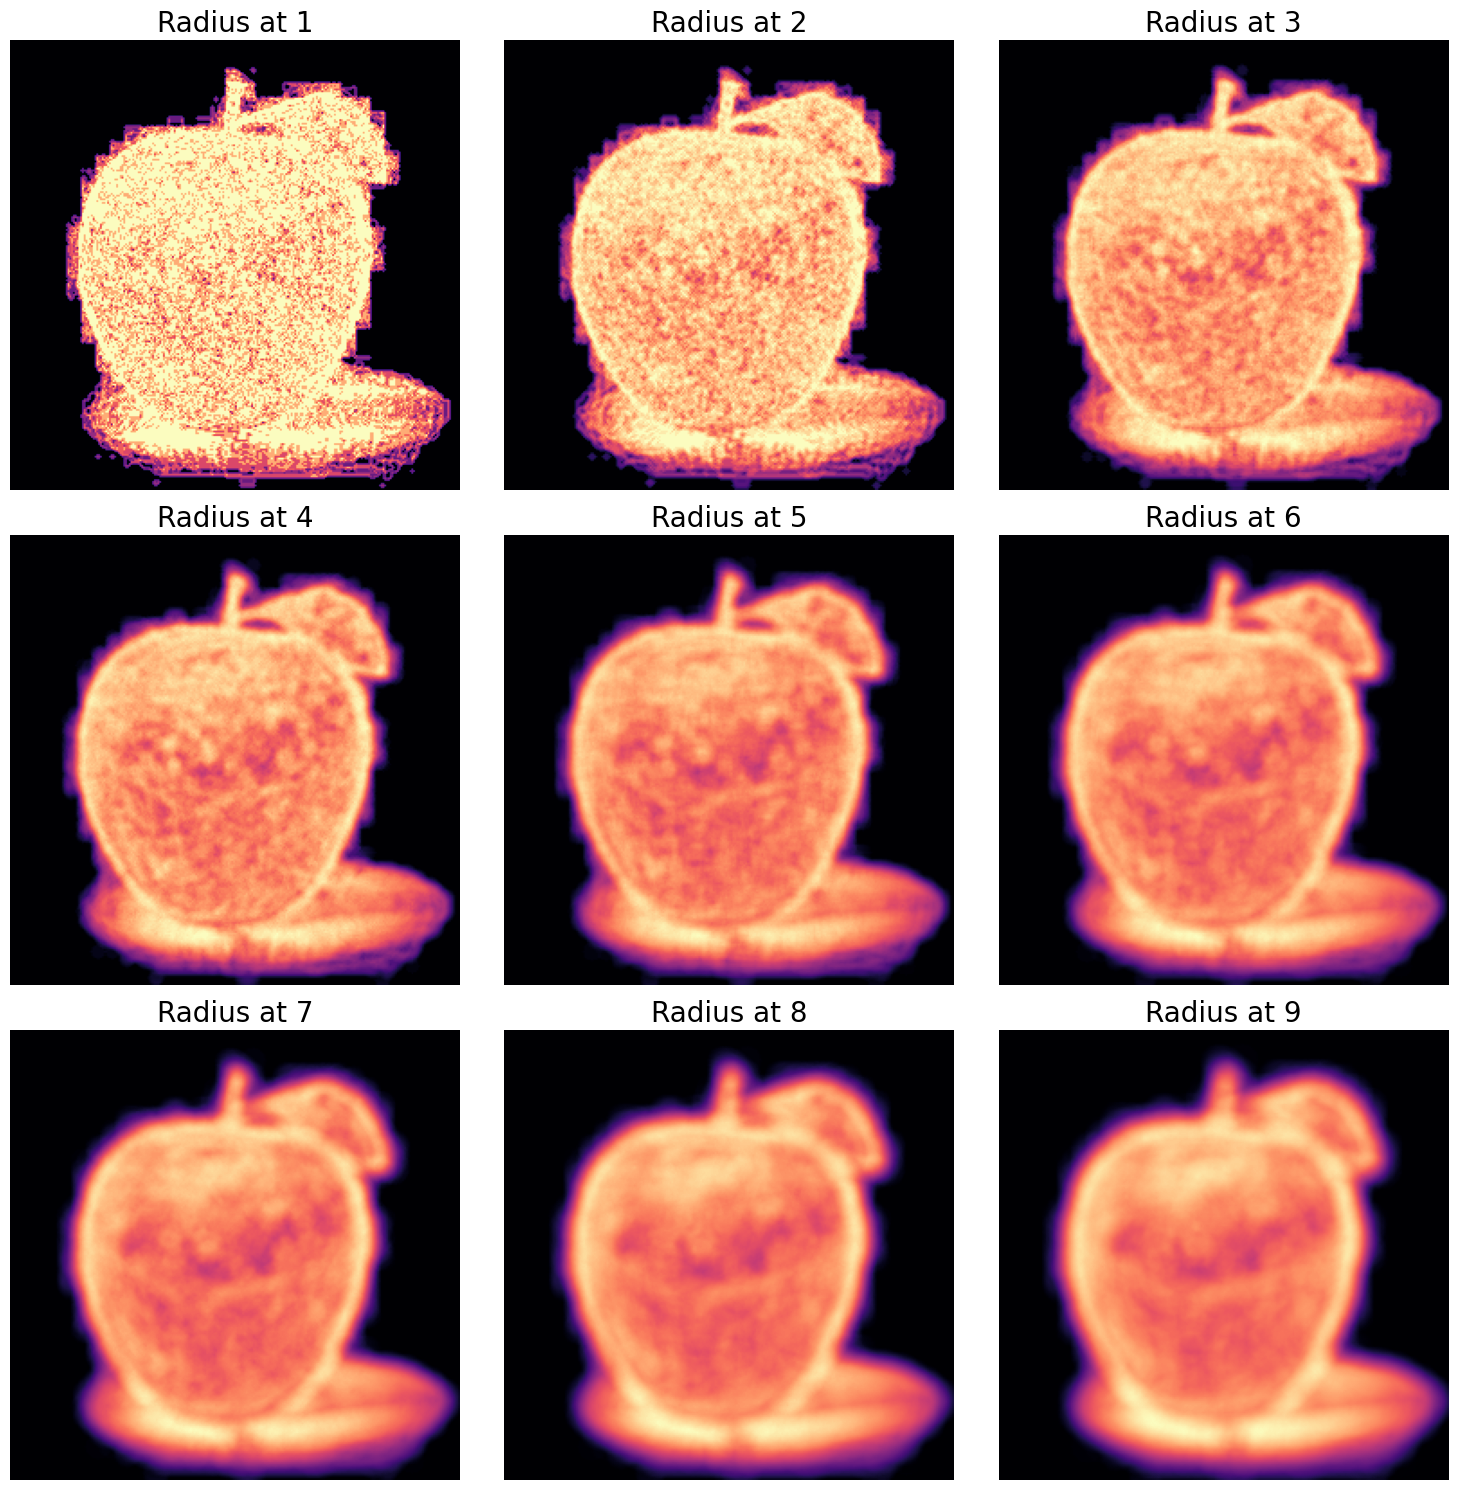

In [13]:
apples.disk_iterations('Apples/0% Rotten/apple_2.jpg')

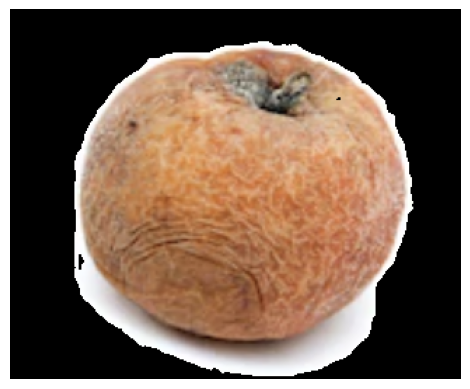

In [14]:
apples.MaskingImage(0.3)

[33919433.   656189.   611000.   682727.   714380.   885632.   948847.
  1092525.  1209482.  1392816.  1806463.  1833619.  2204878.  2559311.
  2871623.  3438908.  3366016.  3558728.  3819495.  3910845.  4175728.
  3851517.  3922555.  4595854.  6898619.]
[35095276.  1481227.  1711847.  2121864.  2604608.  3286690.  3157502.
  3203081.  3271934.  3252426.  3552687.  3112434.  2901129.  2736285.
  2580484.  2669296.  2310481.  2237816.  2144642.  1931685.  1905008.
  1570699.  1506676.  1610405.  2971008.]
[36249807.  2662457.  3259766.  4075291.  4868625.  5729134.  5280255.
  4690483.  3955204.  3348084.  2972772.  2153472.  1728521.  1468822.
  1323984.  1327996.  1123128.   999982.   870236.   794619.   871767.
   858533.   948659.  1086934.  2278659.]


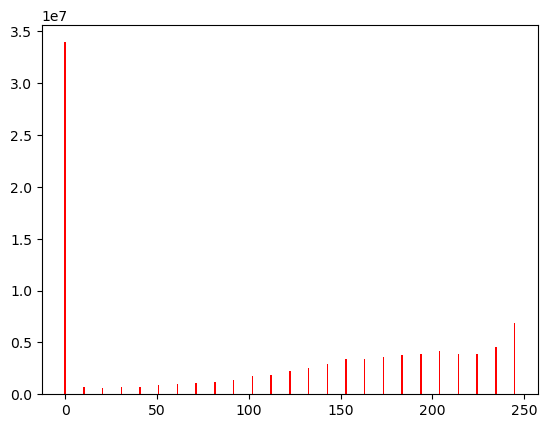

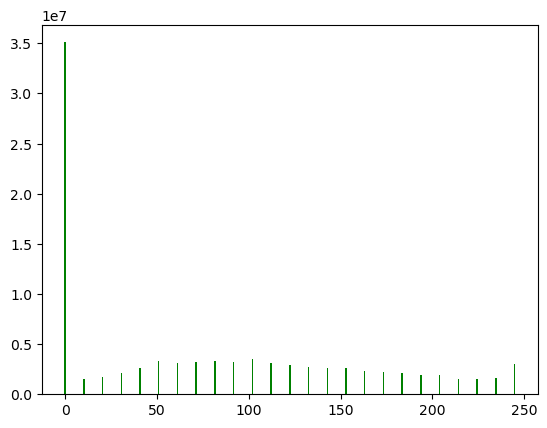

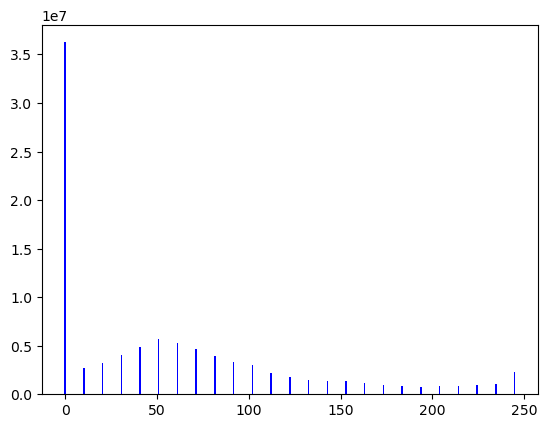

In [15]:
apples.ColorHistogram()

In [16]:
df = apples.FeatureExtraction()
df

image_id      Mean_R  \
0                               aged-apple-3609342.jpg  116.574680   
1                                         apple_06.jpg   92.829948   
2                                          apple_1.jpg  126.601621   
3                                         apple_10.jpg  115.667666   
4                                        apple_102.jpg   95.404453   
..                                                 ...         ...   
544  vertical_flip_Screen Shot 2018-06-08 at 5.21.3...  113.169248   
545  vertical_flip_Screen Shot 2018-06-08 at 5.21.5...  133.427555   
546  vertical_flip_Screen Shot 2018-06-08 at 5.32.5...  129.972148   
547  vertical_flip_Screen Shot 2018-06-08 at 5.33.0...  147.123874   
548  vertical_flip_Screen Shot 2018-06-08 at 5.33.2...  118.022434   

         Mean_G     Mean_B       Std_R       Std_G      Std_B    Skew_R  \
0     96.368696  31.631036  110.927072   94.817043  62.542544 -0.022683   
1     63.642018  39.135234   75.222824   72.492381  57.265294  0.811465   
2     60.299571  54.176066   93.343731   85.473410  82.008587 -0.171645   
3     65.548647  48.449193  101.077764   67.165172  52.728014 -0.169183   
4     89.730260  75.737376  101.121678   95.019454  80.485241  0.503821   
..          ...        ...         ...         ...        ...       ...   
544   73.527950  62.005477  101.429042   78.455838  73.387324 -0.110259   
545   86.491091  81.699171  104.531285   90.353377  89.483826 -0.342734   
546  147.545480  86.051217   79.944886   86.306738  70.132370 -0.669101   
547  135.405464  73.212056  112.814830  101.607526  68.168529 -0.437365   
548   61.873838  56.222632   90.383139   62.958498  60.814208 -0.249492   

       Skew_G    Skew_B  ...  Energy_45  Homogeneity_45  Contrast_90  \
0    0.147751  2.418706  ...   0.342837        0.422519  3221.040112   
1    1.314819  1.750843  ...   0.033586        0.240519   598.831925   
2    1.336736  1.564376  ...   0.189472        0.295228  3670.236931   
3    0.560713  1.022891  ...   0.404395        0.454724   575.293146   
4    0.531439  0.565877  ...   0.049698        0.251109   524.268624   
..        ...       ...  ...        ...             ...          ...   
544  0.750682  1.211557  ...   0.396971        0.456383  2687.181615   
545  0.675732  0.760692  ...   0.309106        0.376753  3159.131764   
546 -0.938851  0.645111  ...   0.200783        0.314227  2781.142159   
547 -0.492897  0.818043  ...   0.241572        0.374547  7540.851917   
548  1.260302  1.580589  ...   0.293311        0.409722  1591.369925   

     Correlation_90  Energy_90  Homogeneity_90  Contrast_135  Correlation_135  \
0          0.751563   0.348949        0.436529   3561.475810         0.725323   
1          0.934097   0.036384        0.282444    717.154365         0.921381   
2          0.724335   0.209172        0.353882   5399.671346         0.596909   
3          0.931970   0.406427        0.459260    664.701033         0.921391   
4          0.968806   0.051450        0.276072    670.815159         0.960104   
..              ...        ...             ...           ...              ...   
544        0.776492   0.407722        0.481223   3056.540945         0.746712   
545        0.800717   0.326296        0.411364   3431.958654         0.783636   
546        0.767846   0.210122        0.331309   2967.681401         0.749421   
547        0.532475   0.251930        0.386747   7929.232674         0.504943   
548        0.795699   0.304821        0.426154   2361.353281         0.697001   

     Energy_135  Homogeneity_135  
0      0.342516         0.424018  
1      0.034329         0.246991  
2      0.190565         0.298613  
3      0.404430         0.454381  
4      0.049905         0.262319  
..          ...              ...  
544    0.399135         0.462591  
545    0.313386         0.385997  
546    0.202723         0.318189  
547    0.241300         0.357496  
548    0.290768         0.400951  

[549 rows x 26 columns]

In [17]:
fol = ['0% Rotten','25% Rotten','50% Rotten','100% Rotten']
dirname = []
imgname = []
d = collections.defaultdict(list)
for i in fol:
    print(i)
    if i == '0% Rotten':
        cluster = 0
    elif i=='25% Rotten':
        cluster = 1
    elif i=='50% Rotten':
        cluster = 2     
    else:
        cluster = 3
    for image in os.listdir(f'Apples/{i}'):
        dirname.append(cluster)
        imgname.append(image)

0% Rotten
25% Rotten
50% Rotten
100% Rotten


In [18]:
cluster1 = pd.DataFrame({'img_name':imgname,'cluster':dirname})
cluster1

img_name  cluster
0                                         apple_06.jpg        0
1                                          apple_1.jpg        0
2                                         apple_10.jpg        0
3                                        apple_102.jpg        0
4                                        apple_109.jpg        0
..                                                 ...      ...
544  translation_Screen Shot 2018-06-08 at 2.38.08 ...        3
545  translation_Screen Shot 2018-06-08 at 2.41.44 ...        3
546  vertical_flip_Screen Shot 2018-06-07 at 2.20.0...        3
547  vertical_flip_Screen Shot 2018-06-07 at 2.59.2...        3
548  vertical_flip_Screen Shot 2018-06-07 at 3.04.4...        3

[549 rows x 2 columns]

In [19]:
actual = []
img = []
for i in df['image_id']:
    img.append(i)
    actual.append(cluster1['cluster'].loc[cluster1['img_name']==i].iloc[0])

In [20]:
df['Grade'] = actual

In [21]:
df

image_id      Mean_R  \
0                               aged-apple-3609342.jpg  116.574680   
1                                         apple_06.jpg   92.829948   
2                                          apple_1.jpg  126.601621   
3                                         apple_10.jpg  115.667666   
4                                        apple_102.jpg   95.404453   
..                                                 ...         ...   
544  vertical_flip_Screen Shot 2018-06-08 at 5.21.3...  113.169248   
545  vertical_flip_Screen Shot 2018-06-08 at 5.21.5...  133.427555   
546  vertical_flip_Screen Shot 2018-06-08 at 5.32.5...  129.972148   
547  vertical_flip_Screen Shot 2018-06-08 at 5.33.0...  147.123874   
548  vertical_flip_Screen Shot 2018-06-08 at 5.33.2...  118.022434   

         Mean_G     Mean_B       Std_R       Std_G      Std_B    Skew_R  \
0     96.368696  31.631036  110.927072   94.817043  62.542544 -0.022683   
1     63.642018  39.135234   75.222824   72.492381  57.265294  0.811465   
2     60.299571  54.176066   93.343731   85.473410  82.008587 -0.171645   
3     65.548647  48.449193  101.077764   67.165172  52.728014 -0.169183   
4     89.730260  75.737376  101.121678   95.019454  80.485241  0.503821   
..          ...        ...         ...         ...        ...       ...   
544   73.527950  62.005477  101.429042   78.455838  73.387324 -0.110259   
545   86.491091  81.699171  104.531285   90.353377  89.483826 -0.342734   
546  147.545480  86.051217   79.944886   86.306738  70.132370 -0.669101   
547  135.405464  73.212056  112.814830  101.607526  68.168529 -0.437365   
548   61.873838  56.222632   90.383139   62.958498  60.814208 -0.249492   

       Skew_G    Skew_B  ...  Homogeneity_45  Contrast_90  Correlation_90  \
0    0.147751  2.418706  ...        0.422519  3221.040112        0.751563   
1    1.314819  1.750843  ...        0.240519   598.831925        0.934097   
2    1.336736  1.564376  ...        0.295228  3670.236931        0.724335   
3    0.560713  1.022891  ...        0.454724   575.293146        0.931970   
4    0.531439  0.565877  ...        0.251109   524.268624        0.968806   
..        ...       ...  ...             ...          ...             ...   
544  0.750682  1.211557  ...        0.456383  2687.181615        0.776492   
545  0.675732  0.760692  ...        0.376753  3159.131764        0.800717   
546 -0.938851  0.645111  ...        0.314227  2781.142159        0.767846   
547 -0.492897  0.818043  ...        0.374547  7540.851917        0.532475   
548  1.260302  1.580589  ...        0.409722  1591.369925        0.795699   

     Energy_90  Homogeneity_90  Contrast_135  Correlation_135  Energy_135  \
0     0.348949        0.436529   3561.475810         0.725323    0.342516   
1     0.036384        0.282444    717.154365         0.921381    0.034329   
2     0.209172        0.353882   5399.671346         0.596909    0.190565   
3     0.406427        0.459260    664.701033         0.921391    0.404430   
4     0.051450        0.276072    670.815159         0.960104    0.049905   
..         ...             ...           ...              ...         ...   
544   0.407722        0.481223   3056.540945         0.746712    0.399135   
545   0.326296        0.411364   3431.958654         0.783636    0.313386   
546   0.210122        0.331309   2967.681401         0.749421    0.202723   
547   0.251930        0.386747   7929.232674         0.504943    0.241300   
548   0.304821        0.426154   2361.353281         0.697001    0.290768   

     Homogeneity_135  Grade  
0           0.424018      1  
1           0.246991      0  
2           0.298613      0  
3           0.454381      0  
4           0.262319      0  
..               ...    ...  
544         0.462591      0  
545         0.385997      0  
546         0.318189      0  
547         0.357496      0  
548         0.400951      0  

[549 rows x 27 columns]

In [22]:
df.to_csv('Apples.csv',index=False)

# Banana

In [7]:
bananas = FruitFreshness('Bananas')

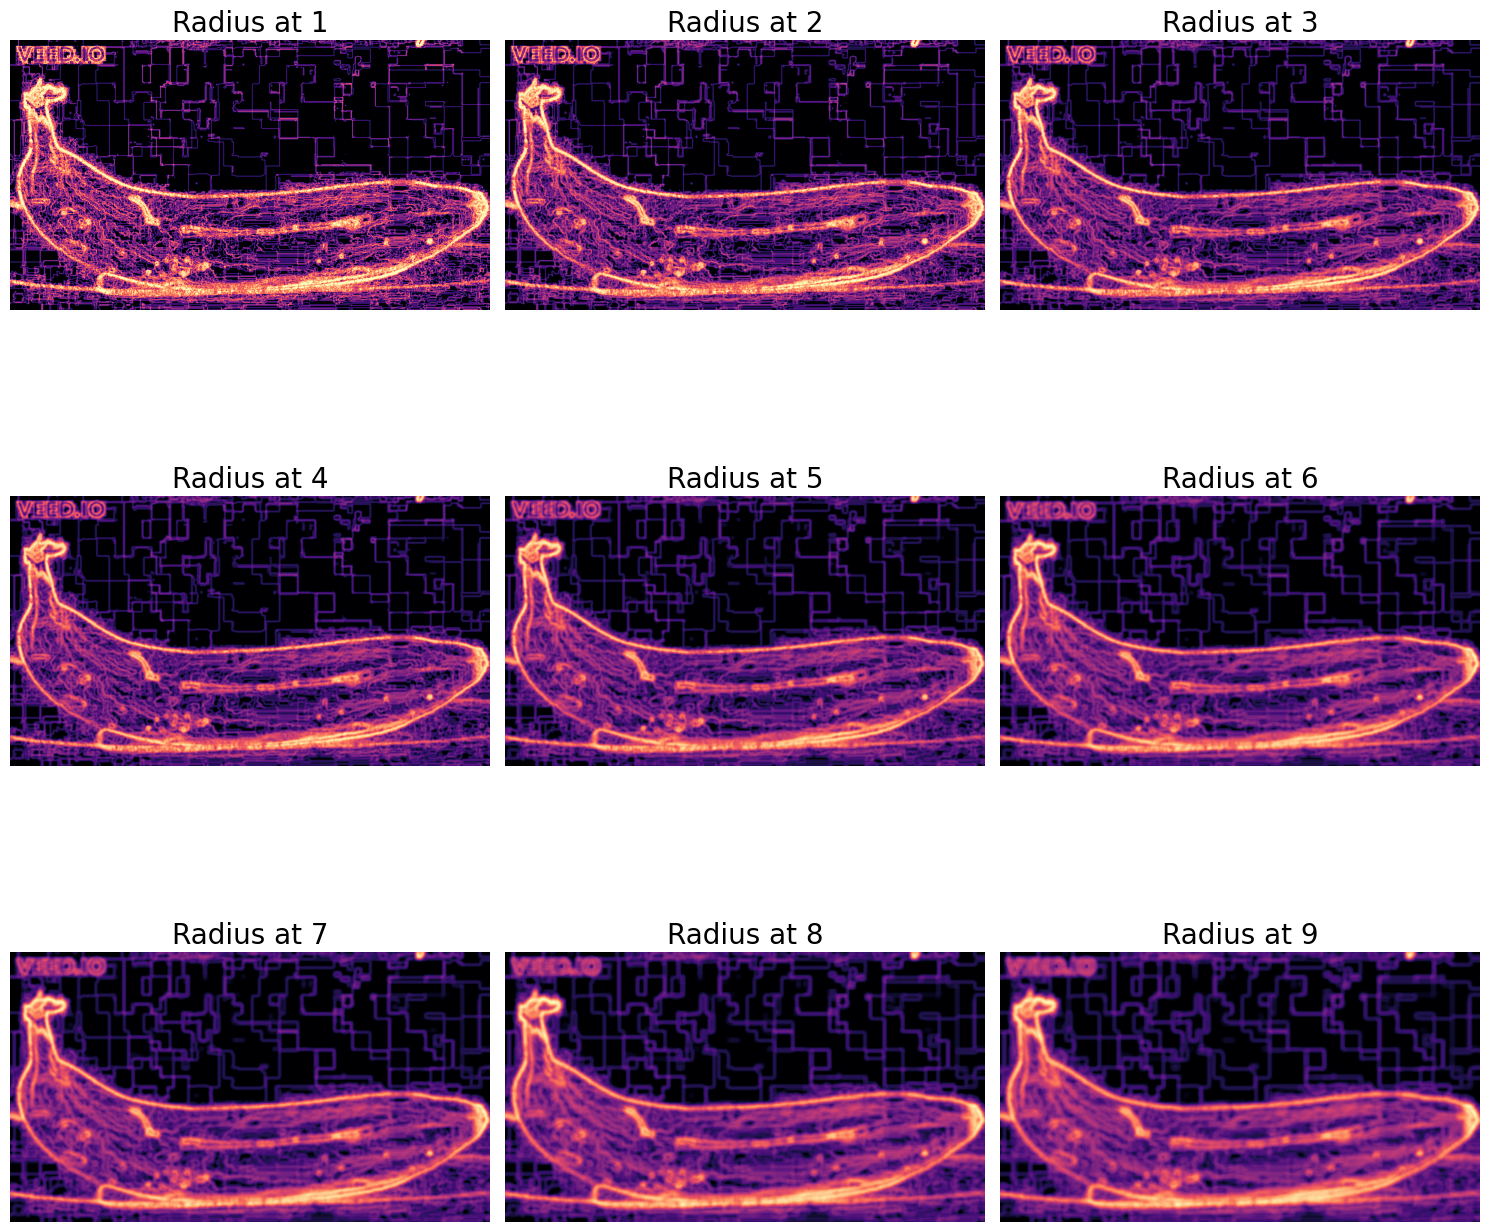

In [8]:
bananas.disk_iterations('Bananas/Banana(10-15)/frame250.jpg')

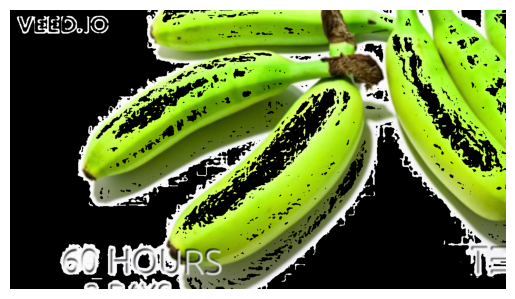

In [9]:
bananas.MaskingImage(0.25)

[1.41537042e+08 6.80763500e+06 2.79491300e+06 2.11121500e+06
 2.09470600e+06 2.47753600e+06 2.48563500e+06 2.70059500e+06
 2.81205000e+06 3.25014000e+06 4.36806200e+06 5.19507200e+06
 6.16510700e+06 6.08440200e+06 5.70715200e+06 6.44879100e+06
 6.01524700e+06 6.24785600e+06 6.67746800e+06 7.79786900e+06
 1.04813090e+07 1.05581600e+07 1.06019480e+07 1.15594600e+07
 1.97169500e+07]
[1.43338483e+08 6.96238300e+06 2.91650300e+06 2.01461800e+06
 2.01890400e+06 2.32257500e+06 2.06623700e+06 2.49274200e+06
 3.37675900e+06 4.35188500e+06 5.49187100e+06 4.85902100e+06
 4.60594000e+06 4.81202200e+06 5.40410400e+06 6.59850400e+06
 6.41916600e+06 6.97340700e+06 7.98423700e+06 8.96916500e+06
 1.09119850e+07 1.07165260e+07 9.82092200e+06 8.56100300e+06
 1.87073580e+07]
[1.64400545e+08 2.22677430e+07 1.15987000e+07 8.01888600e+06
 6.83545000e+06 7.10592700e+06 6.11968300e+06 5.15097000e+06
 4.25591300e+06 3.55170200e+06 3.26259000e+06 2.58677300e+06
 2.43020900e+06 2.28622900e+06 2.19281100e+06 2.242

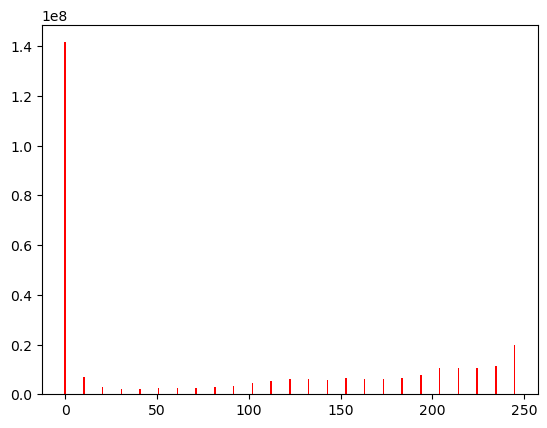

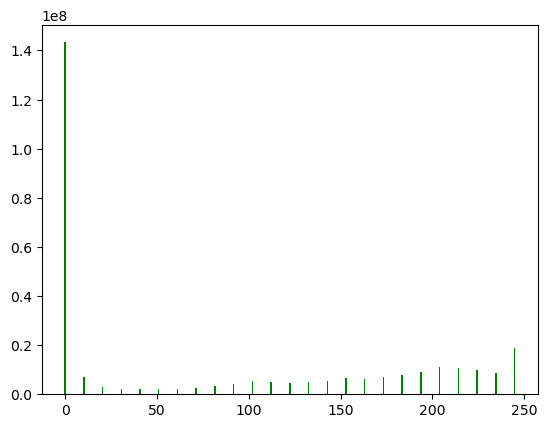

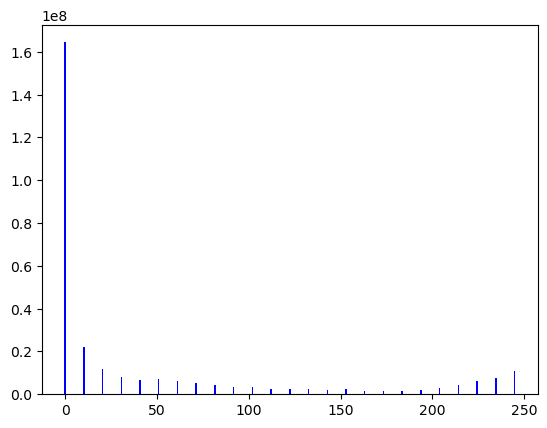

In [10]:
bananas.ColorHistogram()

In [11]:
df_b = bananas.FeatureExtraction()
df_b

image_id      Mean_R      Mean_G     Mean_B       Std_R  \
0      frame1630.jpg  115.161583  122.328091  49.853079  101.049206   
1      frame1640.jpg  116.392135  122.606427  49.963524  101.668523   
2      frame1650.jpg  118.653632  124.163620  50.947316  102.266119   
3      frame1660.jpg  113.146555  116.855483  44.294756  103.643341   
4      frame1670.jpg  116.190691  118.940547  45.003382  104.366894   
..               ...         ...         ...        ...         ...   
377  rotten (76).jpg  106.737249   97.743406  75.519806  105.085305   
378  rotten (77).jpg  106.010605   96.947229  74.525164  105.345455   
379  rotten (78).jpg   45.733415   43.053127  27.871900   60.255904   
380   rotten (8).jpg   44.247310   41.522629  28.731832   60.105834   
381   rotten (9).jpg   43.753103   41.011284  28.647512   59.861496   

          Std_G      Std_B    Skew_R    Skew_G    Skew_B  ...  Energy_45  \
0    107.004588  74.561024 -0.005896 -0.039516  1.685786  ...   0.206830   
1    106.985033  74.692554 -0.019012 -0.045266  1.679812  ...   0.206594   
2    107.095823  74.885052 -0.048848 -0.070369  1.651600  ...   0.209396   
3    107.646784  69.093316  0.047591  0.044949  1.875200  ...   0.236240   
4    107.662274  69.692051  0.007310  0.011866  1.859359  ...   0.228650   
..          ...        ...       ...       ...       ...  ...        ...   
377   96.017383  91.741177  0.149670  0.141866  0.900453  ...   0.178445   
378   96.214612  91.454717  0.165244  0.161727  0.927241  ...   0.178450   
379   59.492773  56.207333  1.121612  1.183585  2.084023  ...   0.326843   
380   59.270701  57.399567  1.236365  1.292698  2.054801  ...   0.309183   
381   59.025552  57.291873  1.262221  1.320627  2.063776  ...   0.308771   

     Homogeneity_45  Contrast_90  Correlation_90  Energy_90  Homogeneity_90  \
0          0.306659  4910.721850        0.697122   0.211378        0.321910   
1          0.305198  4963.587379        0.694170   0.211332        0.320002   
2          0.307918  4865.912515        0.701881   0.214094        0.323103   
3          0.328461  4640.121874        0.708500   0.241194        0.342850   
4          0.322495  4678.495693        0.706629   0.233599        0.336896   
..              ...          ...             ...        ...             ...   
377        0.290957  7389.866403        0.559803   0.185691        0.303461   
378        0.291382  7424.253421        0.558673   0.186099        0.304358   
379        0.438847  2187.679256        0.651932   0.335955        0.439747   
380        0.425612  2421.966406        0.622728   0.317508        0.426382   
381        0.426212  2422.858654        0.620717   0.317344        0.427771   

     Contrast_135  Correlation_135  Energy_135  Homogeneity_135  
0     5037.583798         0.689208    0.207908         0.331710  
1     5063.490418         0.687911    0.207384         0.329232  
2     5042.899009         0.690945    0.210338         0.331359  
3     4686.795254         0.705514    0.238083         0.352883  
4     4712.999283         0.704427    0.230218         0.346902  
..            ...              ...         ...              ...  
377   7970.190673         0.525660    0.178560         0.289224  
378   8002.121983         0.524730    0.178271         0.289146  
379   2496.271771         0.602800    0.326443         0.424537  
380   2744.672166         0.572469    0.307919         0.411315  
381   2740.536968         0.570955    0.307928         0.412426  

[382 rows x 26 columns]

In [12]:
fol_b = ['Banana(1-5)','Banana(5-10)','Banana(10-15)','Banana(15-20)']
dirname_b = []
imgname_b = []
d = collections.defaultdict(list)
for i in fol_b:
    print(i)
    if i =='Banana(1-5)':
        cluster = 3
    elif i=='Banana(5-10)':
        cluster = 2
    elif i=='Banana(10-15)':
        cluster = 1    
    else:
        cluster = 0    
    for image in os.listdir(f'Bananas/{i}'):
        dirname_b.append(cluster)
        imgname_b.append(image)

Banana(1-5)
Banana(5-10)
Banana(10-15)
Banana(15-20)


In [13]:
cluster1 = pd.DataFrame({'img_name':imgname_b,'cluster':dirname_b})
cluster1

img_name  cluster
0       rotten (1).jpg        3
1      rotten (10).jpg        3
2      rotten (11).jpg        3
3      rotten (12).jpg        3
4      rotten (13).jpg        3
..                 ...      ...
377  freshbanana95.jpg        0
378  freshbanana96.jpg        0
379  freshbanana97.jpg        0
380  freshbanana98.jpg        0
381  freshbanana99.jpg        0

[382 rows x 2 columns]

In [14]:
actual = []
img = []
for i in df_b['image_id']:
    img.append(i)
    actual.append(cluster1['cluster'].loc[cluster1['img_name']==i].iloc[0])

In [15]:
df_b['Grade'] = actual

In [16]:
df_b

image_id      Mean_R      Mean_G     Mean_B       Std_R  \
0      frame1630.jpg  115.161583  122.328091  49.853079  101.049206   
1      frame1640.jpg  116.392135  122.606427  49.963524  101.668523   
2      frame1650.jpg  118.653632  124.163620  50.947316  102.266119   
3      frame1660.jpg  113.146555  116.855483  44.294756  103.643341   
4      frame1670.jpg  116.190691  118.940547  45.003382  104.366894   
..               ...         ...         ...        ...         ...   
377  rotten (76).jpg  106.737249   97.743406  75.519806  105.085305   
378  rotten (77).jpg  106.010605   96.947229  74.525164  105.345455   
379  rotten (78).jpg   45.733415   43.053127  27.871900   60.255904   
380   rotten (8).jpg   44.247310   41.522629  28.731832   60.105834   
381   rotten (9).jpg   43.753103   41.011284  28.647512   59.861496   

          Std_G      Std_B    Skew_R    Skew_G    Skew_B  ...  Homogeneity_45  \
0    107.004588  74.561024 -0.005896 -0.039516  1.685786  ...        0.306659   
1    106.985033  74.692554 -0.019012 -0.045266  1.679812  ...        0.305198   
2    107.095823  74.885052 -0.048848 -0.070369  1.651600  ...        0.307918   
3    107.646784  69.093316  0.047591  0.044949  1.875200  ...        0.328461   
4    107.662274  69.692051  0.007310  0.011866  1.859359  ...        0.322495   
..          ...        ...       ...       ...       ...  ...             ...   
377   96.017383  91.741177  0.149670  0.141866  0.900453  ...        0.290957   
378   96.214612  91.454717  0.165244  0.161727  0.927241  ...        0.291382   
379   59.492773  56.207333  1.121612  1.183585  2.084023  ...        0.438847   
380   59.270701  57.399567  1.236365  1.292698  2.054801  ...        0.425612   
381   59.025552  57.291873  1.262221  1.320627  2.063776  ...        0.426212   

     Contrast_90  Correlation_90  Energy_90  Homogeneity_90  Contrast_135  \
0    4910.721850        0.697122   0.211378        0.321910   5037.583798   
1    4963.587379        0.694170   0.211332        0.320002   5063.490418   
2    4865.912515        0.701881   0.214094        0.323103   5042.899009   
3    4640.121874        0.708500   0.241194        0.342850   4686.795254   
4    4678.495693        0.706629   0.233599        0.336896   4712.999283   
..           ...             ...        ...             ...           ...   
377  7389.866403        0.559803   0.185691        0.303461   7970.190673   
378  7424.253421        0.558673   0.186099        0.304358   8002.121983   
379  2187.679256        0.651932   0.335955        0.439747   2496.271771   
380  2421.966406        0.622728   0.317508        0.426382   2744.672166   
381  2422.858654        0.620717   0.317344        0.427771   2740.536968   

     Correlation_135  Energy_135  Homogeneity_135  Grade  
0           0.689208    0.207908         0.331710      1  
1           0.687911    0.207384         0.329232      1  
2           0.690945    0.210338         0.331359      1  
3           0.705514    0.238083         0.352883      1  
4           0.704427    0.230218         0.346902      1  
..               ...         ...              ...    ...  
377         0.525660    0.178560         0.289224      3  
378         0.524730    0.178271         0.289146      3  
379         0.602800    0.326443         0.424537      3  
380         0.572469    0.307919         0.411315      3  
381         0.570955    0.307928         0.412426      3  

[382 rows x 27 columns]

In [18]:
df_b.to_csv('Banana.csv',index=False)

# Tomato

In [19]:
tomatoes = FruitFreshness('Tomatoes')

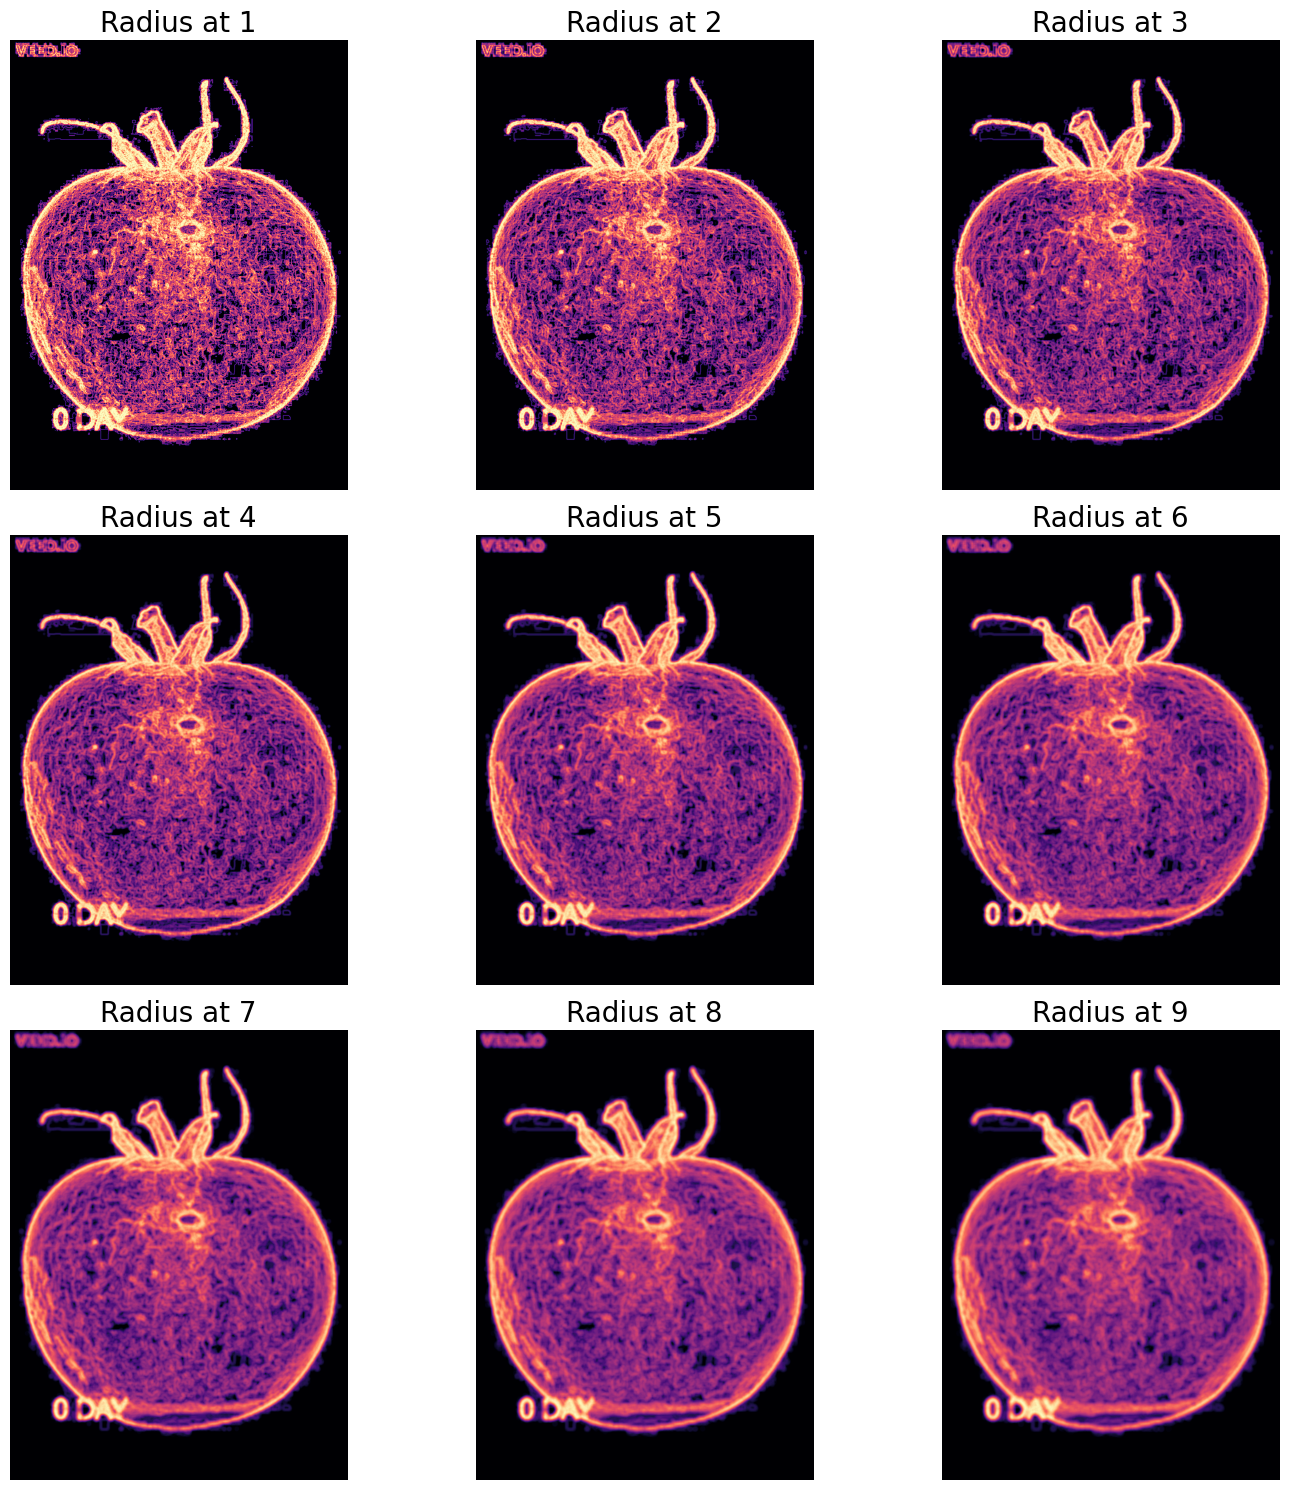

In [21]:
tomatoes.disk_iterations('Tomatoes/Tomato(10-15)/fresh (1).jpg')

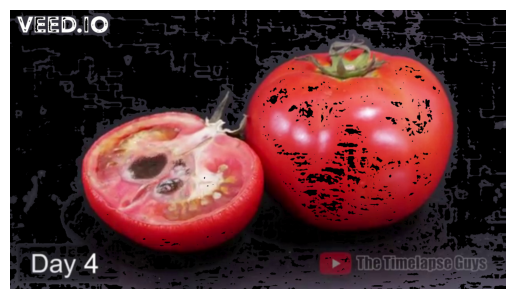

In [22]:
tomatoes.MaskingImage(0.25)

[83777346.  4300217.  3705614.  3467890.  2820160.  2609228.  2179598.
  2118676.  2309137.  2632993.  3197985.  3092734.  3374371.  3862817.
  4406255.  5710948.  6130465.  6930035.  7333962.  7335630.  6845297.
  5461961.  5396368.  8572858.  9106295.]
[91591827.  8517456.  8192641.  7867808.  7530644.  8455003.  7867294.
  7701240.  6749621.  5571794.  5194068.  4102835.  3517200.  2998799.
  2727448.  3046291.  2563849.  2105117.  1897321.  1602924.  1232895.
   832232.   670220.   859137.  3283176.]
[1.01784416e+08 1.36263950e+07 1.23012270e+07 1.11724090e+07
 9.16253200e+06 7.51934600e+06 5.02481900e+06 3.99392500e+06
 3.50540800e+06 3.16978900e+06 3.25289100e+06 2.72596700e+06
 2.55183900e+06 2.36697500e+06 2.18443500e+06 2.20224200e+06
 1.63942600e+06 1.25683700e+06 9.75195000e+05 7.36637000e+05
 6.17849000e+05 4.94001000e+05 5.12195000e+05 8.36483000e+05
 3.06560200e+06]


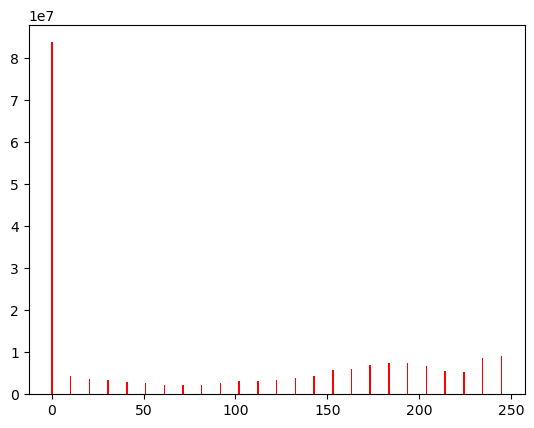

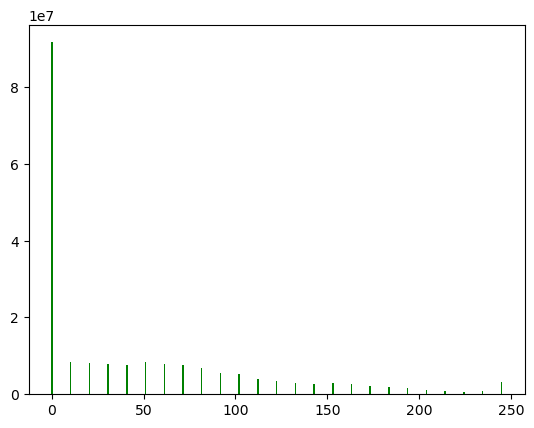

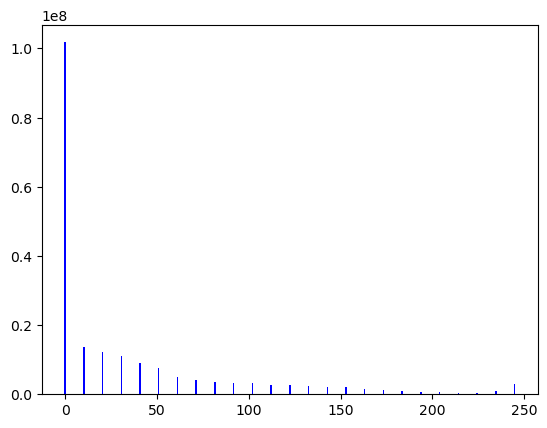

In [23]:
tomatoes.ColorHistogram()

In [24]:
df_t = tomatoes.FeatureExtraction()
df_t

image_id      Mean_R     Mean_G     Mean_B       Std_R      Std_G  \
0       frame110.jpg   76.718346  27.990320  17.086820  106.667204  51.014825   
1       frame240.jpg  113.034349  35.532920  21.010144   84.893457  48.958522   
2       frame250.jpg  113.675066  36.256742  21.727671   85.073852  49.927705   
3       frame260.jpg  114.171972  37.246604  22.722233   85.157021  51.456534   
4       frame270.jpg  114.251510  38.055804  23.651326   85.102833  52.943685   
..               ...         ...        ...        ...         ...        ...   
264  rotten (95).jpg   57.154683  44.075770  40.624102   66.608523  54.257840   
265  rotten (96).jpg   43.692381  40.855193  48.390881   58.545949  55.491366   
266  rotten (97).jpg   61.445004  51.428911  48.240715   75.639094  69.162184   
267  rotten (98).jpg   51.568321  45.710164  46.907582   62.844159  57.412480   
268  rotten (99).jpg   56.238051  42.651590  38.996994   66.373246  50.048126   

         Std_B    Skew_R    Skew_G    Skew_B  ...  Energy_45  Homogeneity_45  \
0    42.349059  0.782999  2.192736  3.338703  ...   0.508859        0.575056   
1    45.818761 -0.280012  2.067089  2.994477  ...   0.152552        0.285918   
2    46.959050 -0.287860  2.033024  2.924368  ...   0.154804        0.289214   
3    48.680782 -0.296853  2.000309  2.833765  ...   0.158257        0.291988   
4    50.252845 -0.295871  1.973671  2.749690  ...   0.158819        0.291449   
..         ...       ...       ...       ...  ...        ...             ...   
264  52.086966  0.906762  1.114390  1.275525  ...   0.282132        0.387032   
265  62.886003  1.341146  1.358163  1.187897  ...   0.287286        0.398960   
266  67.200263  0.777180  1.000821  1.108749  ...   0.302001        0.399185   
267  58.454855  1.114923  1.168714  1.124631  ...   0.249788        0.363068   
268  45.952746  1.057762  1.214808  1.290996  ...   0.266130        0.379968   

     Contrast_90  Correlation_90  Energy_90  Homogeneity_90  Contrast_135  \
0     548.281912        0.894712   0.514432        0.586606    700.066841   
1     517.658656        0.888940   0.155666        0.304593    608.939337   
2     518.915166        0.892924   0.158095        0.306950    610.949998   
3     536.628384        0.895440   0.161716        0.308869    614.350513   
4     546.893655        0.898911   0.162191        0.307668    628.548930   
..           ...             ...        ...             ...           ...   
264   974.044165        0.832085   0.294045        0.420737   1333.848155   
265   941.528198        0.856032   0.298614        0.432035   1301.040961   
266  1785.991467        0.810749   0.314487        0.433509   2285.663441   
267   873.240460        0.867424   0.261283        0.395752   1208.687744   
268   638.815449        0.869407   0.279048        0.418983    924.928901   

     Correlation_135  Energy_135  Homogeneity_135  
0           0.865858    0.508822         0.573172  
1           0.869540    0.152218         0.284119  
2           0.874106    0.154410         0.287049  
3           0.880460    0.157598         0.289676  
4           0.883980    0.158199         0.288832  
..               ...         ...              ...  
264         0.770263    0.281587         0.383221  
265         0.801301    0.287295         0.398924  
266         0.758081    0.302088         0.395916  
267         0.816675    0.249425         0.365883  
268         0.811037    0.265805         0.381157  

[269 rows x 26 columns]

In [25]:
fol_t = ['Tomato(1-5)','Tomato(5-10)','Tomato(10-15)']
dirname_t = []
imgname_t = []
d = collections.defaultdict(list)
for i in fol_t:
    print(i)
    if i =='Tomato(1-5)':
        cluster = 2
    elif i=='Tomato(5-10)':
        cluster = 1
    else:
        cluster = 0    
    for image in os.listdir(f'Tomatoes/{i}'):
        dirname_t.append(cluster)
        imgname_t.append(image)

Tomato(1-5)
Tomato(5-10)
Tomato(10-15)


In [26]:
cluster2 = pd.DataFrame({'img_name':imgname_t,'cluster':dirname_t})
cluster2

img_name  cluster
0      rotten (1).jpg        2
1     rotten (10).jpg        2
2    rotten (100).jpg        2
3    rotten (101).jpg        2
4    rotten (102).jpg        2
..                ...      ...
264    fresh (85).jpg        0
265    fresh (86).jpg        0
266    fresh (87).jpg        0
267    fresh (88).jpg        0
268     fresh (9).jpg        0

[269 rows x 2 columns]

In [27]:
actual = []
img = []
for i in df_t['image_id']:
    img.append(i)
    actual.append(cluster2['cluster'].loc[cluster2['img_name']==i].iloc[0])

In [28]:
df_t['Grade'] = actual

In [29]:
df_t

image_id      Mean_R     Mean_G     Mean_B       Std_R      Std_G  \
0       frame110.jpg   76.718346  27.990320  17.086820  106.667204  51.014825   
1       frame240.jpg  113.034349  35.532920  21.010144   84.893457  48.958522   
2       frame250.jpg  113.675066  36.256742  21.727671   85.073852  49.927705   
3       frame260.jpg  114.171972  37.246604  22.722233   85.157021  51.456534   
4       frame270.jpg  114.251510  38.055804  23.651326   85.102833  52.943685   
..               ...         ...        ...        ...         ...        ...   
264  rotten (95).jpg   57.154683  44.075770  40.624102   66.608523  54.257840   
265  rotten (96).jpg   43.692381  40.855193  48.390881   58.545949  55.491366   
266  rotten (97).jpg   61.445004  51.428911  48.240715   75.639094  69.162184   
267  rotten (98).jpg   51.568321  45.710164  46.907582   62.844159  57.412480   
268  rotten (99).jpg   56.238051  42.651590  38.996994   66.373246  50.048126   

         Std_B    Skew_R    Skew_G    Skew_B  ...  Homogeneity_45  \
0    42.349059  0.782999  2.192736  3.338703  ...        0.575056   
1    45.818761 -0.280012  2.067089  2.994477  ...        0.285918   
2    46.959050 -0.287860  2.033024  2.924368  ...        0.289214   
3    48.680782 -0.296853  2.000309  2.833765  ...        0.291988   
4    50.252845 -0.295871  1.973671  2.749690  ...        0.291449   
..         ...       ...       ...       ...  ...             ...   
264  52.086966  0.906762  1.114390  1.275525  ...        0.387032   
265  62.886003  1.341146  1.358163  1.187897  ...        0.398960   
266  67.200263  0.777180  1.000821  1.108749  ...        0.399185   
267  58.454855  1.114923  1.168714  1.124631  ...        0.363068   
268  45.952746  1.057762  1.214808  1.290996  ...        0.379968   

     Contrast_90  Correlation_90  Energy_90  Homogeneity_90  Contrast_135  \
0     548.281912        0.894712   0.514432        0.586606    700.066841   
1     517.658656        0.888940   0.155666        0.304593    608.939337   
2     518.915166        0.892924   0.158095        0.306950    610.949998   
3     536.628384        0.895440   0.161716        0.308869    614.350513   
4     546.893655        0.898911   0.162191        0.307668    628.548930   
..           ...             ...        ...             ...           ...   
264   974.044165        0.832085   0.294045        0.420737   1333.848155   
265   941.528198        0.856032   0.298614        0.432035   1301.040961   
266  1785.991467        0.810749   0.314487        0.433509   2285.663441   
267   873.240460        0.867424   0.261283        0.395752   1208.687744   
268   638.815449        0.869407   0.279048        0.418983    924.928901   

     Correlation_135  Energy_135  Homogeneity_135  Grade  
0           0.865858    0.508822         0.573172      1  
1           0.869540    0.152218         0.284119      1  
2           0.874106    0.154410         0.287049      1  
3           0.880460    0.157598         0.289676      1  
4           0.883980    0.158199         0.288832      1  
..               ...         ...              ...    ...  
264         0.770263    0.281587         0.383221      2  
265         0.801301    0.287295         0.398924      2  
266         0.758081    0.302088         0.395916      2  
267         0.816675    0.249425         0.365883      2  
268         0.811037    0.265805         0.381157      2  

[269 rows x 27 columns]

In [30]:
df_t.to_csv('Tomato.csv',index=False)